# Selección de características

## Introducción

En esta sesión vamos a ver los aspectos básicos y herramientas que nos va a permitir usar técnicas de selección de características en `python`. 

<div class="alert alert-info">
  <strong>Librerías necesarias:</strong> 
  
  `pandas`, `numpy` y `scikit-learn`.
</div>

In [32]:
%pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

## Eliminación de variables con varianza baja

La clase `VarianceThreshold` es un enfoque básico de selección de características que funciona eliminando todas las características cuya varianza no alcanza cierto umbral. Por defecto, elimina todas las características con varianza cero, es decir, aquellas características que tienen el mismo valor en todas las muestras.

Como ejemplo, supongamos que tenemos un conjunto de datos con características booleanas, y queremos eliminar todas las características que son cero o uno (apagado o encendido) en más del 80% de las muestras. En este caso, las características booleanas son variables aleatorias de Bernoulli y su varianza está definida por:

$$Var(X)=p \cdot (1-p)$$

de forma que se pueda seleccionar utilizando el umbral $0.8 \cdot (1 - 0.8)$.

In [2]:
from sklearn.feature_selection import VarianceThreshold

X = pd.DataFrame([[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]], columns=("A", "B", "C"))
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = pd.DataFrame(sel.fit_transform(X), columns=sel.get_feature_names_out())

for feature, variance in zip(sel.feature_names_in_, sel.variances_):
    print(feature, variance)
    
X

A 0.13888888888888892
B 0.22222222222222224
C 0.25


,B,C
0,0,1
1,1,0
2,0,0
3,1,1
4,1,0
5,1,1


Como se esperaba, VarianceThreshold ha eliminado la primera columna, que tiene una probabilidad $p=5/6=0.83>0.8$ de contener un cero.

<div class="alert alert-info">
<strong>Ejercicio:</strong>

Carga el dataset de cancer de pecho desde `sklearn` y comprueba las varianzas de cada columna. ¿Cuantas/Que features quedan si empleamos un filtro con un threshold de 0.25?

Para cargar el dataset podeis llamar a `sklearn.datasets.load_breast_cancer()`

</div>

In [3]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
Y = pd.DataFrame(dataset.data, columns=dataset.feature_names)
sel = VarianceThreshold(threshold=0.25)
Y_select = pd.DataFrame(sel.fit_transform(Y), columns=sel.get_feature_names_out())

print("\nCaracterísticas seleccionadas:", Y_select.shape[1])
print("\nCaracterísticas eliminadas:", Y.shape[1] - Y_select.shape[1])

Y_select


Características seleccionadas: 11

Características eliminadas: 19


,mean radius,mean texture,mean perimeter,mean area,texture error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area
0,17.99,10.38,122.80,1001.0,0.9053,8.589,153.40,25.380,17.33,184.60,2019.0
1,20.57,17.77,132.90,1326.0,0.7339,3.398,74.08,24.990,23.41,158.80,1956.0
2,19.69,21.25,130.00,1203.0,0.7869,4.585,94.03,23.570,25.53,152.50,1709.0
3,11.42,20.38,77.58,386.1,1.1560,3.445,27.23,14.910,26.50,98.87,567.7
4,20.29,14.34,135.10,1297.0,0.7813,5.438,94.44,22.540,16.67,152.20,1575.0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,1.2560,7.673,158.70,25.450,26.40,166.10,2027.0
565,20.13,28.25,131.20,1261.0,2.4630,5.203,99.04,23.690,38.25,155.00,1731.0
566,16.60,28.08,108.30,858.1,1.0750,3.425,48.55,18.980,34.12,126.70,1124.0
567,20.60,29.33,140.10,1265.0,1.5950,5.772,86.22,25.740,39.42,184.60,1821.0


De las 30 variables originales, solo quedan 11: `mean radius`, `mean texture`, `mean perimeter`, `mean area`, `texture error`, `perimeter error`, `area error`, `worst radius`, `worst texture`, `worst perimeter` y `worst area`.

<div class="alert alert-info">
<strong>Ejercicio:</strong>

Fijate en la distribución de valores de las columnas. ¿Que valores mínimo y máximo tienen? ¿Como es su varianza? ¿Tiene sentido aplicar el mismo threshold a todas? Prueba a reescalar los datos empleando un `MinMaxScaler` y aplica ahora un filtrado con un threshold de 0.025. ¿Cuantas columnas se eliminan?
</div>

In [4]:
print(f'Valor mínimo de cada columna:\n {Y.min()}\n\n')

Valor mínimo de cada columna:
 mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness  

In [5]:
print(f'Valor máximo de cada columna:\n {Y.max()}\n\n')

Valor máximo de cada columna:
 mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.16340
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09744
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness  

In [6]:
print(f'Varianza de cada columna:\n {Y.var()}\n\n')

Varianza de cada columna:
 mean radius                    12.418920
mean texture                   18.498909
mean perimeter                590.440480
mean area                  123843.554318
mean smoothness                 0.000198
mean compactness                0.002789
mean concavity                  0.006355
mean concave points             0.001506
mean symmetry                   0.000752
mean fractal dimension          0.000050
radius error                    0.076902
texture error                   0.304316
perimeter error                 4.087896
area error                   2069.431583
smoothness error                0.000009
compactness error               0.000321
concavity error                 0.000911
concave points error            0.000038
symmetry error                  0.000068
fractal dimension error         0.000007
worst radius                   23.360224
worst texture                  37.776483
worst perimeter              1129.130847
worst area                 324

In [7]:
from sklearn.preprocessing import MinMaxScaler

# reescalado de los datos
scaler = MinMaxScaler()
Y_scaled = pd.DataFrame(scaler.fit_transform(Y), columns=Y.columns)

# selección de características
sel = VarianceThreshold(threshold=0.025)
Y_select_scaled = pd.DataFrame(sel.fit_transform(Y_scaled), columns=sel.get_feature_names_out())

print("\nCaracterísticas seleccionadas:", Y_select_scaled.shape[1])
print("\nCaracterísticas eliminadas:", Y.shape[1] - Y_select_scaled.shape[1])

Y_select_scaled


Características seleccionadas: 10

Características eliminadas: 20


,mean radius,mean perimeter,mean compactness,mean concavity,mean concave points,worst radius,worst texture,worst perimeter,worst concavity,worst concave points
0,0.521037,0.545989,0.792037,0.703140,0.731113,0.620776,0.141525,0.668310,0.568610,0.912027
1,0.643144,0.615783,0.181768,0.203608,0.348757,0.606901,0.303571,0.539818,0.192971,0.639175
2,0.601496,0.595743,0.431017,0.462512,0.635686,0.556386,0.360075,0.508442,0.359744,0.835052
3,0.210090,0.233501,0.811361,0.565604,0.522863,0.248310,0.385928,0.241347,0.548642,0.884880
4,0.629893,0.630986,0.347893,0.463918,0.518390,0.519744,0.123934,0.506948,0.319489,0.558419
...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.678668,0.296055,0.571462,0.690358,0.623266,0.383262,0.576174,0.328035,0.761512
565,0.622320,0.604036,0.257714,0.337395,0.486630,0.560655,0.699094,0.520892,0.256789,0.559450
566,0.455251,0.445788,0.254340,0.216753,0.263519,0.393099,0.589019,0.379949,0.271805,0.487285
567,0.644564,0.665538,0.790197,0.823336,0.755467,0.633582,0.730277,0.668310,0.749760,0.910653


Debido a las distintas escalas, antes nos quedamos con variables con altos valores pero con una varianza baja, y eliminamos variables que, debido a sus bajos valores, tenían una varianza intrínsecamente baja. Al reescalar, evitamos este problema y sustituimos las variables `mean area`, `mean texture`, `texture error`, `worst area`, `area error`, `perimeter error` por `mean compactness`, `mean concavity`, `mean concave points`, `worst concavity` y `worst concave points`, todo esto conservando ahora 10 en vez de 11 características.

## Selección de características univariante

La selección univariante de características funciona seleccionando las mejores características basadas en pruebas estadísticas univariantes. `scikit-learn` expone rutinas de selección de características como objetos que implementan el método `transform`:

- `SelectKBest`: elimina todas las características excepto aquellas con mayor puntuación.
- `SelectPercentile`: elimina todas las características excepto un porcentaje, especificado por el usuario, de las características con mayor puntuación. 
- `SelectFpr`: elimina las características en base a tasa de falsos positivos.
- `SelectFdr`: elimina las características en base a tasa de falsos descubrimientos. 
- `SelectFwe`: elimina las características en base a errores de la familia (se refiere a la probabilidad de cometer al menos un error de tipo I, es decir, rechazar una hipótesis nula verdadera).
- `GenericUnivariateSelect`:  permite realizar la selección univariante de características con una estrategia configurable. 

Estos objetos toman como entrada una función de puntuación que devuelve puntuaciones univariadas y/o p-valores:

- Para regresión: `r_regression`, `f_regression`, `mutual_info_regression`
- Para clasificación: `chi2`, `f_classif`, `mutual_info_classif`

Los métodos basados en el [test F](https://es.wikipedia.org/wiki/Prueba_F_de_Fisher) estiman el grado de dependencia lineal entre dos variables aleatorias. Por otro lado, los métodos de información mutua pueden capturar cualquier tipo de dependencia estadística, pero al ser no paramétricos, requieren más muestras para una estimación precisa. 

<div class="alert alert-danger">
<strong>Atención</strong>

El test chi-cuadrado solo debe aplicarse a características no negativas, como por ejemplo a frecuencias.
</div>

Por ejemplo, para obtener las cinco variables más informativas del dataset de cancer de pecho aplicando segun la información mútua bastaría con ejecutar el siguiente código: 

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

data, target = load_breast_cancer(return_X_y=True, as_frame=True)
feature_selector = SelectKBest(mutual_info_classif, k=5)

clean_data = pd.DataFrame(feature_selector.fit_transform(data, target), columns=feature_selector.get_feature_names_out()) 
clean_data

,mean concave points,worst radius,worst perimeter,worst area,worst concave points
0,0.14710,25.380,184.60,2019.0,0.2654
1,0.07017,24.990,158.80,1956.0,0.1860
2,0.12790,23.570,152.50,1709.0,0.2430
3,0.10520,14.910,98.87,567.7,0.2575
4,0.10430,22.540,152.20,1575.0,0.1625
...,...,...,...,...,...
564,0.13890,25.450,166.10,2027.0,0.2216
565,0.09791,23.690,155.00,1731.0,0.1628
566,0.05302,18.980,126.70,1124.0,0.1418
567,0.15200,25.740,184.60,1821.0,0.2650


<div class="alert alert-info">
<strong>Ejercicio:</strong>

Prueba a seleccionar las mejores caracteristicas empleando el family-wise error y el estadístico F. ¿Que columnas se han eliminado?
</div>

In [9]:
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import f_classif

data, target = load_breast_cancer(return_X_y=True, as_frame=True)
feature_selector = SelectFwe(f_classif, alpha=0.05)

clean_data = pd.DataFrame(feature_selector.fit_transform(data, target), columns=feature_selector.get_feature_names_out()) 

deleted_caract = set(data.columns) - set(clean_data.columns)
deleted_caract

{'fractal dimension error',
 'mean fractal dimension',
 'smoothness error',
 'symmetry error',
 'texture error'}

Se eliminaron solo 5 características: `fractal dimension error`, `mean fractal dimension`, `smoothness error`, `symmetry error`, `texture error`.

Probemos el resto de métodos. Empezamos con `SelectPercentile`.

In [34]:
from sklearn.feature_selection import SelectPercentile, mutual_info_classif

data, target = load_breast_cancer(return_X_y=True, as_frame=True)

feature_selector = SelectPercentile(mutual_info_classif, percentile=25) # 25% mejores caract

clean_data = pd.DataFrame(feature_selector.fit_transform(data, target), columns=feature_selector.get_feature_names_out())

deleted_caract = set(data.columns) - set(clean_data.columns)
deleted_caract

{'area error',
 'compactness error',
 'concave points error',
 'concavity error',
 'fractal dimension error',
 'mean area',
 'mean compactness',
 'mean fractal dimension',
 'mean smoothness',
 'mean symmetry',
 'mean texture',
 'perimeter error',
 'radius error',
 'smoothness error',
 'symmetry error',
 'texture error',
 'worst compactness',
 'worst concavity',
 'worst fractal dimension',
 'worst smoothness',
 'worst symmetry',
 'worst texture'}

Se eliminaron 22 características. Ahora vamos a probar con `SelectFpr`.

In [11]:
from sklearn.feature_selection import SelectFpr

data, target = load_breast_cancer(return_X_y=True, as_frame=True)

feature_selector = SelectFpr(f_classif, alpha=0.05) # p-valor menor a 0.05

clean_data = pd.DataFrame(feature_selector.fit_transform(data, target), columns=feature_selector.get_feature_names_out())

deleted_caract = set(data.columns) - set(clean_data.columns)
deleted_caract

{'fractal dimension error',
 'mean fractal dimension',
 'smoothness error',
 'symmetry error',
 'texture error'}

Eliminamos solo 5 características. Probamos también con `SelectFdr`.

In [12]:
from sklearn.feature_selection import SelectFdr

data, target = load_breast_cancer(return_X_y=True, as_frame=True)

feature_selector = SelectFdr(f_classif, alpha=0.05) # tasa de falso descubrim menor a 0.05

clean_data = pd.DataFrame(feature_selector.fit_transform(data, target), columns=feature_selector.get_feature_names_out())

deleted_caract = set(data.columns) - set(clean_data.columns)
deleted_caract

{'fractal dimension error',
 'mean fractal dimension',
 'smoothness error',
 'symmetry error',
 'texture error'}

Eliminamos las mismas características de antes. Terminamos con `GenericUnivariateSelect`.

In [38]:
from sklearn.feature_selection import GenericUnivariateSelect

data, target = load_breast_cancer(return_X_y=True, as_frame=True)

feature_selector = GenericUnivariateSelect(mutual_info_classif, mode='k_best', param=5) # 5 mejores caract

clean_data = pd.DataFrame(feature_selector.fit_transform(data, target), columns=feature_selector.get_feature_names_out())

deleted_caract = set(data.columns) - set(clean_data.columns)
deleted_caract

{'area error',
 'compactness error',
 'concave points error',
 'concavity error',
 'fractal dimension error',
 'mean area',
 'mean compactness',
 'mean concavity',
 'mean fractal dimension',
 'mean perimeter',
 'mean radius',
 'mean smoothness',
 'mean symmetry',
 'mean texture',
 'perimeter error',
 'radius error',
 'smoothness error',
 'symmetry error',
 'texture error',
 'worst compactness',
 'worst concavity',
 'worst fractal dimension',
 'worst smoothness',
 'worst symmetry',
 'worst texture'}

Eliminamos 25 características, ya que nos quedamos solo con las 5 mejores.

## Importancia de la selección de variables
En la práctica, para una correcta selección de variables sería necesario comprobar si el modelo entrenado se comporta correctamente con los datos de prueba. Para ello, vamos a modificar el ejemplo anterior añadiendo, además, algo de ruido a los datos.

In [14]:
import numpy as np

from sklearn.model_selection import train_test_split

data, target = load_breast_cancer(return_X_y=True, as_frame=True)

# Generamos 20 columnas de ruido
noise = pd.DataFrame(np.random.default_rng().uniform(0, 0.1, size=(data.shape[0], 20)), columns=[f"noise_{i}" for i in range(20)])

combined = pd.concat([data, noise], axis=1)

# Partimos el dataset en entrenamiento y test para seleccionar las features y evaluar el clasificador
X_train, X_test, y_train, y_test = train_test_split(combined, target, stratify=target, random_state=42)

El procedimiento de selección sería similar al ejemplo anterior, pero ajustando el modelo a los datos de entrenamiento: 

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

Podemos ver las puntuaciones en la siguiente gráfica:

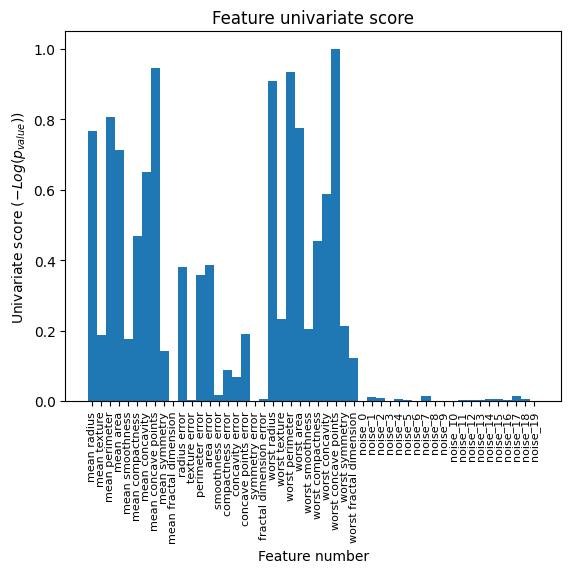

In [16]:
import matplotlib.pyplot as plt

X_indices = np.arange(X_train.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices, scores, width=1)
plt.xticks(
    ticks=X_indices,
    labels= combined.columns.tolist(),
    fontsize=8, 
    rotation=90
)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

Vemos facilmente que hay variables que tienen mucha mas importancia que otras.
Comprobemos el efecto de la selección de variables utilizando un modelo de clasificación en el conjunto de pruebas. 

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

classifier_with_selection = make_pipeline(
    SelectFwe(f_classif), MinMaxScaler(), LinearSVC(random_state=42)
)
classifier_with_selection.fit(X_train, y_train)
print(
    "Classification accuracy after univariate feature selection: {:.3f}".format(
        classifier_with_selection.score(X_test, y_test)
    )
)

svm_weights_selected = np.abs(classifier_with_selection[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

Classification accuracy after univariate feature selection: 0.986


Veamos ahora el comportamiento del clasificador pero sin selección de características: 

In [18]:
classifier = make_pipeline(MinMaxScaler(), LinearSVC(random_state=42))
classifier.fit(X_train, y_train)
print(
    "Classification accuracy without selecting features: {:.3f}".format(
        classifier.score(X_test, y_test)
    )
)

svm_weights = np.abs(classifier[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

Classification accuracy without selecting features: 0.979


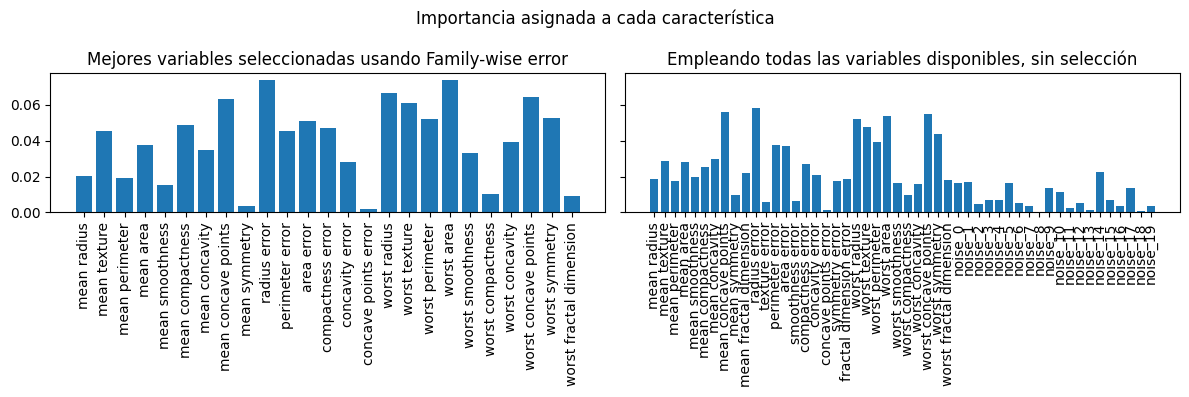

Classification accuracy after univariate feature selection: 0.986
Classification accuracy without selecting features: 0.979


In [19]:
# Crear subgráficos para comparar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Gráfico de barras para svm_weights_selected
ax1.bar(range(len(svm_weights_selected)), svm_weights_selected)
ax1.set_title('Mejores variables seleccionadas usando Family-wise error')
ax1.set_xticks(
    range(len(svm_weights_selected)), 
    labels=classifier_with_selection[0].get_feature_names_out(),
    rotation=90    
)

# Gráfico de barras para svm_weights
ax2.bar(range(len(svm_weights)), svm_weights)
ax2.set_title('Empleando todas las variables disponibles, sin selección')
ax2.set_xticks(range(len(svm_weights)), labels=combined.columns, rotation=90)

# Mostrar los gráficos
plt.suptitle("Importancia asignada a cada característica")
plt.tight_layout()
plt.show()

print("Classification accuracy after univariate feature selection: {:.3f}".format(classifier_with_selection.score(X_test, y_test)))
print("Classification accuracy without selecting features: {:.3f}".format(classifier.score(X_test, y_test)))

<div class="alert alert-info">
<strong>Ejercicio:</strong>

Que pasa con los resultados de accuracy en cada caso? Por que? Como varía el peso dado a las variable cuando no aplicamos selección de variables?
</div>

Antes de la selección de variables añadimos ruido a los datos. Esto sumado a las características del dataset original que eliminaba family-wise error con el estadístico F, dificulta que el modelo aprenda correctamente los patrones de las características realmente informativas y se fije más en el ruido, dando un modelo más complejo (aún así, se obtiene un modelo con un 96.5% de *accuracy* usando todas las variables). Al eliminarlas, permitimos al modelo aprender sobre los datos relevantes, mejorando en un 2% el *accuracy* tras hacer la selección de características.

Respecto a los pesos, se puede ver en las gráficas anteriores como las variables seleccionadas tienen un mayor peso en el modelo tras la selección de características. Esto se debe a que, en el modelo completo, las variables no informativas también tienen cierto peso que, aunque pequeño, disminuye el peso de las variables realmente informativas. 

## Diferencias entre funciones de puntuación
El siguiente ejemplo ilustra las diferencias entre el estadístico F y la información mutua.

Consideremos 3 características $x_1$, $x_2$, $x_3$ distribuidas uniformemente sobre [0, 1], donde el objetivo se define como:

$$y = x_1 + sin(6 * pi * x_2) + 0.1 * N(0, 1)$$

es decir, la tercera característica $x_3$ es completamente irrelevante.

El código que se muestra a continuación traza la dependencia de y contra cada $x_i$ y los valores normalizados de las estadísticas de las pruebas F univariadas y la información mutua.

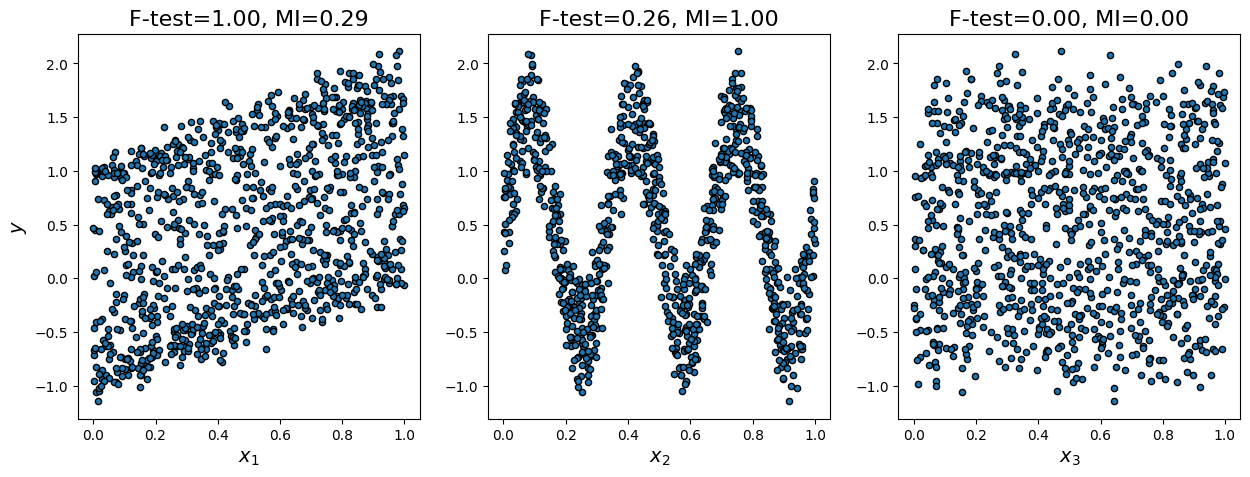

In [20]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X = np.random.default_rng().random((1000, 3))
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=16)
plt.show()

Como la prueba F solo captura dependencia lineal, califica a $x_1$ como la característica más discriminativa. Por otro lado, la información mutua puede capturar cualquier tipo de dependencia entre variables y califica a $x_2$ como la característica más discriminativa, lo cual probablemente concuerda mejor con nuestra percepción intuitiva para este ejemplo. Ambos métodos marcan correctamente a $x_3$ como irrelevante.

## Selección de características basadas en wrappers

Para este ejemplo emplearemos el dataset `digits` de Scikit-learn, un dataset análogo al MNIST pero con imagenes de menor resolución (8x8, lo que da un total de 64 características).

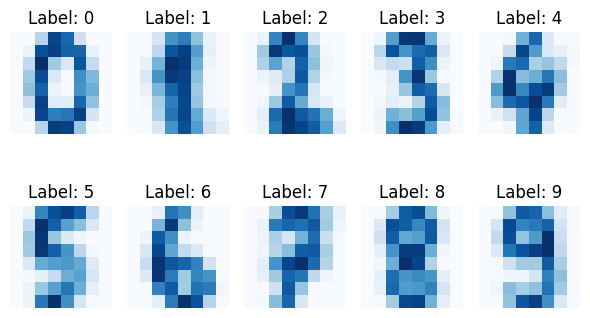

In [21]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits, target = load_digits(return_X_y=True, as_frame=True)
data = pd.concat([digits, target], axis=1)

fig, axes = plt.subplots(2, 5, figsize=(6, 4))
axes = axes.ravel()

for label in range(10):
    sum = (data[data["target"] == label].sum()).to_numpy()[:64].reshape((8, 8))
    axes[label].imshow(sum, cmap=plt.cm.Blues)
    axes[label].set_title(f'Label: {label}')
    axes[label].axis('off')

plt.tight_layout()
plt.show()

Dado un estimador externo que asigna pesos a las características (por ejemplo, los coeficientes de un modelo lineal), el objetivo de la eliminación recursiva de características (RFE, por sus siglas en inglés) es seleccionar características considerando recursivamente conjuntos de características cada vez menores. Primero, el estimador se entrena con el conjunto inicial de características y se obtiene la importancia de cada característica ya sea a través de un atributo específico (como  `coef_`, `feature_importances_`) o un `callable`. A continuación, las características menos importantes se eliminan del conjunto de características y el proceso se repite recursivamente hasta que se alcanza finalmente el número deseado de características a seleccionar.

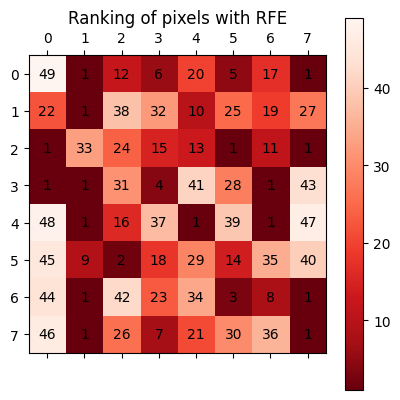

In [22]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

rfe = RFE(estimator=LinearSVC(), n_features_to_select=16)
rfe.fit(digits, target)
ranking = rfe.ranking_.reshape((8, 8))

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Reds_r)

# Add annotations for pixel numbers
for i in range(ranking.shape[0]):
    for j in range(ranking.shape[1]):
        plt.text(j, i, str(ranking[i, j]), ha="center", va="center", color="black")

plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

En la gráfica anterior, los colores mas oscuros representan las features mas importantes.

<div class="alert alert-info">
<strong>Ejercicio:</strong>

Repite el ejemplo anterior empleando únicamente los números menores que 5 y seleccionando las 8 mejores features. ¿Cuales son los 8 pixeles son más significativos?
</div>

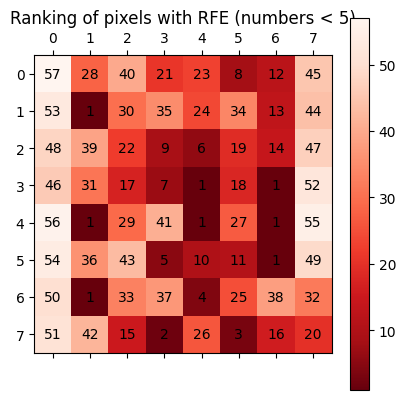

8 pixeles más significativos son: [(1, 1), (3, 4), (3, 6), (4, 1), (4, 4), (4, 6), (5, 6), (6, 1)]


In [23]:
menor5 = data[data['target'] < 5]
less_digits = menor5.drop(columns=['target'])
less_target = menor5['target']

rfe = RFE(estimator=LinearSVC(), n_features_to_select=8)
rfe.fit(less_digits, less_target)
ranking = rfe.ranking_.reshape((8, 8))

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Reds_r)

# Add annotations for pixel numbers
for i in range(ranking.shape[0]):
    for j in range(ranking.shape[1]):
        plt.text(j, i, str(ranking[i, j]), ha="center", va="center", color="black")

plt.colorbar()
plt.title("Ranking of pixels with RFE (numbers < 5)")
plt.show()

pixel_ranking = {(i, j): ranking[i, j] for i in range(ranking.shape[0]) for j in range(ranking.shape[1])}
pixel_ranking_ordenado = sorted(pixel_ranking.items(), key=lambda x: x[1])
pixels = [pix for pix, _ in pixel_ranking_ordenado]
print("8 pixeles más significativos son:", pixels[:8])

El problema de la eliminación recursiva de características es que debemos determinar a priori el número de features que queremos conservar. Para solventar esta debilidad podemos emplear la variante RFECV, que realiza RFE en un bucle de validación cruzada para encontrar el número óptimo de características. En más detalle, el número de características seleccionadas se ajusta automáticamente al ajustar un selector RFE en los diferentes splits de validación cruzada (proporcionados por el parámetro cv). El rendimiento del selector RFE se evalúa utilizando un scorer para diferentes números de características seleccionadas y se agregan juntos. Finalmente, las puntuaciones se promedian a través de los pliegues y el número de características seleccionadas se establece en el número de características que maximiza la puntuación de validación cruzada.

Optimal number of features: 45


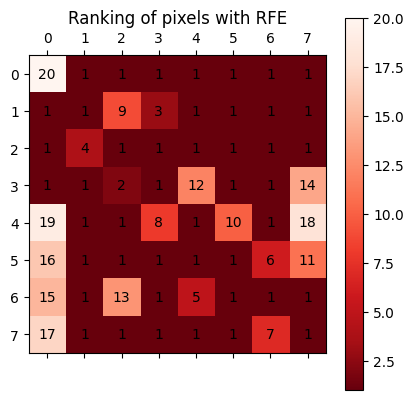

In [24]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

rfecv = RFECV(
    estimator=LinearSVC(), 
    cv=StratifiedKFold(8), 
    scoring="accuracy",
    n_jobs=8,
)
rfecv.fit(digits, target)

print(f"Optimal number of features: {rfecv.n_features_}")

ranking = rfecv.ranking_.reshape((8, 8))

plt.matshow(ranking, cmap=plt.cm.Reds_r)

for i in range(ranking.shape[0]):
    for j in range(ranking.shape[1]):
        plt.text(j, i, str(ranking[i, j]), ha="center", va="center", color="black")

plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

En la siguiente gráfica podemos ver como aumenta la precisión a medida que consideramos características (aka, pixeles), hasta el punto de que añadir más características no mejora significativamente el resultado de la clasificación. 

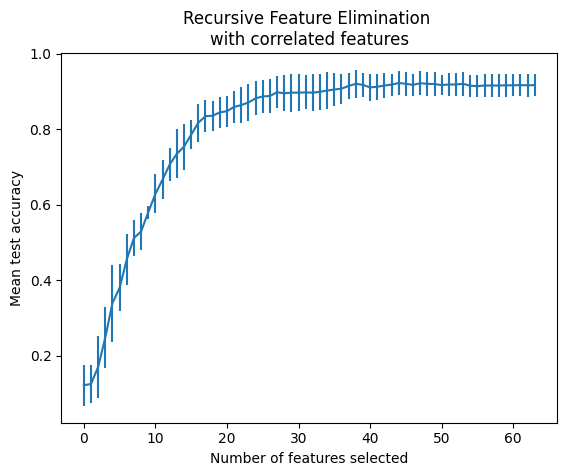

In [25]:
n_scores = len(rfecv.cv_results_["mean_test_score"])

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(n_scores),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

<div class="alert alert-info">
<strong>Ejercicio:</strong>

Cual es el numero óptimo de features para diferenciar los 0 de los 1?
</div>

Optimal number of features: 4


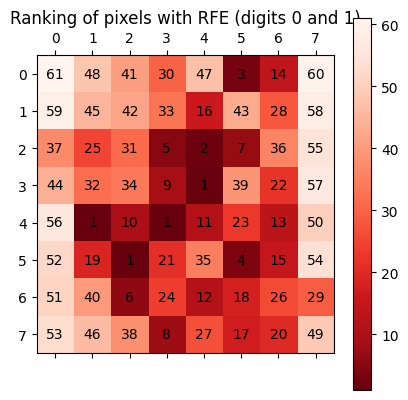

In [26]:
digits, target = load_digits(return_X_y=True, as_frame=True)
data = pd.concat([digits, target], axis=1)

# filtramos solo 0 y 1
data_filtered = data[data['target'].isin([0, 1])]
digits_filtered = data_filtered.drop(columns=['target'])
target_filtered = data_filtered['target']

rfecv = RFECV(
    estimator=LinearSVC(),
    cv=StratifiedKFold(8),
    scoring="accuracy",
    n_jobs=8,
)
rfecv.fit(digits_filtered, target_filtered)

print(f"Optimal number of features: {rfecv.n_features_}")
ranking = rfecv.ranking_.reshape((8, 8))

plt.matshow(ranking, cmap=plt.cm.Reds_r)

for i in range(ranking.shape[0]):
    for j in range(ranking.shape[1]):
        plt.text(j, i, str(ranking[i, j]), ha="center", va="center", color="black")

plt.colorbar()
plt.title("Ranking of pixels with RFE (digits 0 and 1)")
plt.show()

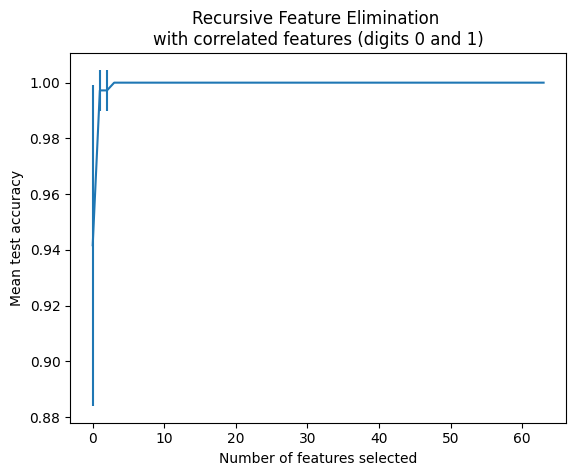

In [27]:
n_scores = len(rfecv.cv_results_["mean_test_score"])

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(n_scores),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features (digits 0 and 1)")
plt.show()

## Métodos empotrados

Los métodos empotrados o embebidos (*embedded* en inglés) son técnicas de selección de variables que integran el proceso de selección directamente en el algoritmo de modelado. A diferencia de los métodos basados en filtros, que seleccionan variables antes de construir el modelo, o de los métodos basados en *wrappers*, que iteran sobre subconjuntos de variables, los métodos embebidos realizan la selección de variables durante el proceso de entrenamento del modelo. Esto hace que sean más eficientes y, en muchos casos, más precisos.

Algunos ejemplos son:

- La regresión Lasso, que añade una penalización L1 a la función de coste del modelo, lo que hace que los coeficientes de algunas variables se reduzan a cero, siendo eliminadas automaticamente.

- La regresión Ridge, que aplica una regularización L2 y no realiza una selección de variables estricta pero penaliza los coeficientes grandes, lo que puede resultar útil a la hora de reducir el impacto de las variables menos importantes.

- Los algoritmos basados en árboles de decisión (incluidos los ensembles de estos), que miden la importancia de las variables en función de su contribución a la redución de la impureza al construir el árbol. Como consecuencia, proporcionan una métrica de importancia de las variables, lo que permite seleccionar las más relevantes.

Un método frecuentemente usado como primera aproximación debido a su simplicidade y precisión es el Random Forest. Este método de *ensemble* entrena un gran número de árboles de decisión utilizando distintos subconjuntos de variables y datos. A continuación toma la frecuencia de las variables más representativas en los árbores con mejor rendimiento para estimar la importancia de cada característica.

Una diferencia clave entre los métodos embebidos y el resto es que los primeros pueden tener en cuenta la interacción entre características, ya que el modelo aprende la importancia de las características de forma global, considerando como interactúan entre si. 

A continuación tenemos un ejemplo de selección de características usando Random Forest.

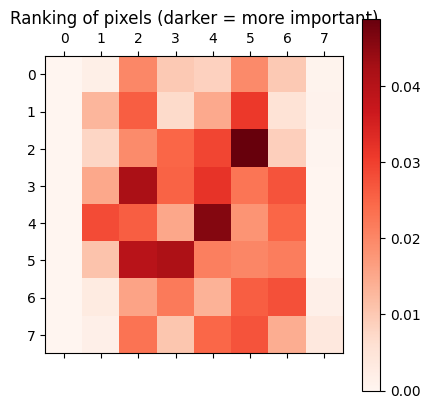

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(digits, target)

importances = rf.feature_importances_.reshape((8, 8))

plt.matshow(importances, cmap=plt.cm.Reds)

plt.colorbar()
plt.title("Ranking of pixels (darker = more important)")
plt.show()

Con estas importancias calculadas podemos emplear la clase `SelectFromModel` para quedarnos con las variables más relevantes.

In [29]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rf, threshold='mean')
sfm.fit(digits, target)

selected = sfm.transform(digits)

print("Número de características originales:", digits.shape[1])
print("Número de características seleccionadas:", selected.shape[1])

Número de características originales: 64
Número de características seleccionadas: 30


<div class="alert alert-info">
<strong>Ejercicio:</strong>

Que pasa con los pixeles de las columnas de los extremos? Por que?
</div>

Si nos fijamos en las imagenes originales, los pixeles de las columnas de los extremos usualmente no contienen ningún tipo de trazo y, en su defecto, no suele ser relevante (los dígitos tienden a estar centrados). Debido a esto, de forma general los pixeles más informativos estarán en el centro de la imagen, mientras que los extremos no aportarán casi información relevante.

Ahora, probemos la selección de características con regresión Lasso

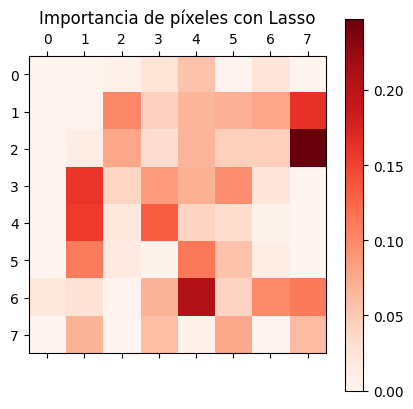

Número de características originales: 64
Número de características seleccionadas con Lasso: 26


In [30]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(digits, target)

# coeficientes como importancia de las características
importances_lasso = np.abs(lasso.coef_).reshape((8, 8))

plt.matshow(importances_lasso, cmap=plt.cm.Reds)
plt.colorbar()

plt.title("Importancia de píxeles con Lasso")
plt.show()

# selección de características 
sfm_lasso = SelectFromModel(lasso, threshold='mean')
sfm_lasso.fit(digits, target)

selected_lasso = sfm_lasso.transform(digits)

print("Número de características originales:", digits.shape[1])
print("Número de características seleccionadas con Lasso:", selected_lasso.shape[1])

Por último, probemos la selección de características usando regresión Ridge

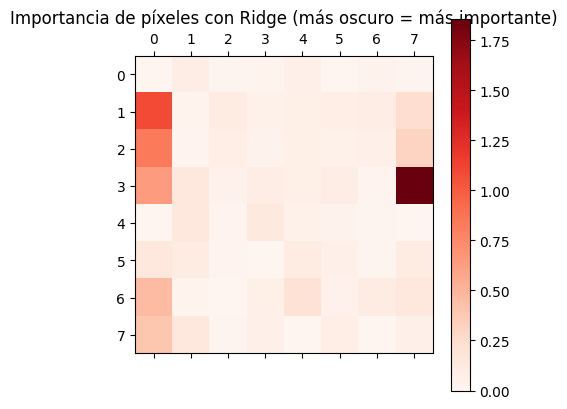

Número de características originales: 64
Número de características seleccionadas con Ridge: 13


In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(digits, target)

# coeficientes como importancia de las características
importances_ridge = np.abs(ridge.coef_).reshape((8, 8))

plt.matshow(importances_ridge, cmap=plt.cm.Reds)
plt.colorbar()

plt.title("Importancia de píxeles con Ridge (más oscuro = más importante)")
plt.show()

# selección de características 
sfm_ridge = SelectFromModel(ridge, threshold='mean')
sfm_ridge.fit(digits, target)

selected_ridge = sfm_ridge.transform(digits)

print("Número de características originales:", digits.shape[1])
print("Número de características seleccionadas con Ridge:", selected_ridge.shape[1])